In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("supermarket_sales.csv")

In [3]:
raw_data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## jawaban nomor 1
<pre>
tentukan variable dependent dan independent dari dataset:
1. variable independent:
    - Unit Price (harga 1 unit)
    - Quantity (jumalh)
    - Tax (pajak)
    - COGS (harga pokok penjualan)
2. variable dependent:
    - total = Unit Price * Quantity
    - gross margin persentage (porsentasi laba kotor) = (penjualan bersih  - cogs) / penjualan bersih
        dimana penjualan bersih = gross income - (pengemablian, diskon, pajak, biaya admin dll)
    - Rating = kepuasan pelanggan, tegantung dri pelayanan dan yang jelas adalah harga dan kualitas barang
</pre>


## jawaban nomor 2
lakukan eksplorasi dan visualisasi data
+ +nomor 3 analisis data

In [4]:
#periksa data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#total row : 1000, tidak ada field yang kosong

In [6]:
#periksa kolom kolom yang merupakan kolom kategori
columns = ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]
for column in (columns):
    print(raw_data[column].value_counts())
    print("_____________________________________________")

A    340
B    332
C    328
Name: Branch, dtype: int64
_____________________________________________
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
_____________________________________________
Member    501
Normal    499
Name: Customer type, dtype: int64
_____________________________________________
Female    501
Male      499
Name: Gender, dtype: int64
_____________________________________________
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
_____________________________________________
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64
_____________________________________________


sus :
- kota & Branch
- member & gender

In [7]:
#cek kota dan branch
kota_branch_A = raw_data[ raw_data["Branch"]=="A"]
print(kota_branch_A["City"].value_counts())
print("_____________________________________________")
kota_branch_B = raw_data[ raw_data["Branch"]=="B"]
print(kota_branch_B["City"].value_counts())
print("_____________________________________________")
kota_branch_C = raw_data[ raw_data["Branch"]=="C"]
print(kota_branch_C["City"].value_counts())
#terbukti sus

Yangon    340
Name: City, dtype: int64
_____________________________________________
Mandalay    332
Name: City, dtype: int64
_____________________________________________
Naypyitaw    328
Name: City, dtype: int64


In [8]:
# cek gender dan costumer type
gender_costumer_male = raw_data[raw_data["Gender"]=="Male"]
print(gender_costumer_male["Customer type"].value_counts())
print("_____________________________________________")
gender_costumer_female = raw_data[raw_data["Gender"]=="Female"]
print(gender_costumer_female["Customer type"].value_counts())
#tidak terbukti sus

Normal    259
Member    240
Name: Customer type, dtype: int64
_____________________________________________
Member    261
Normal    240
Name: Customer type, dtype: int64


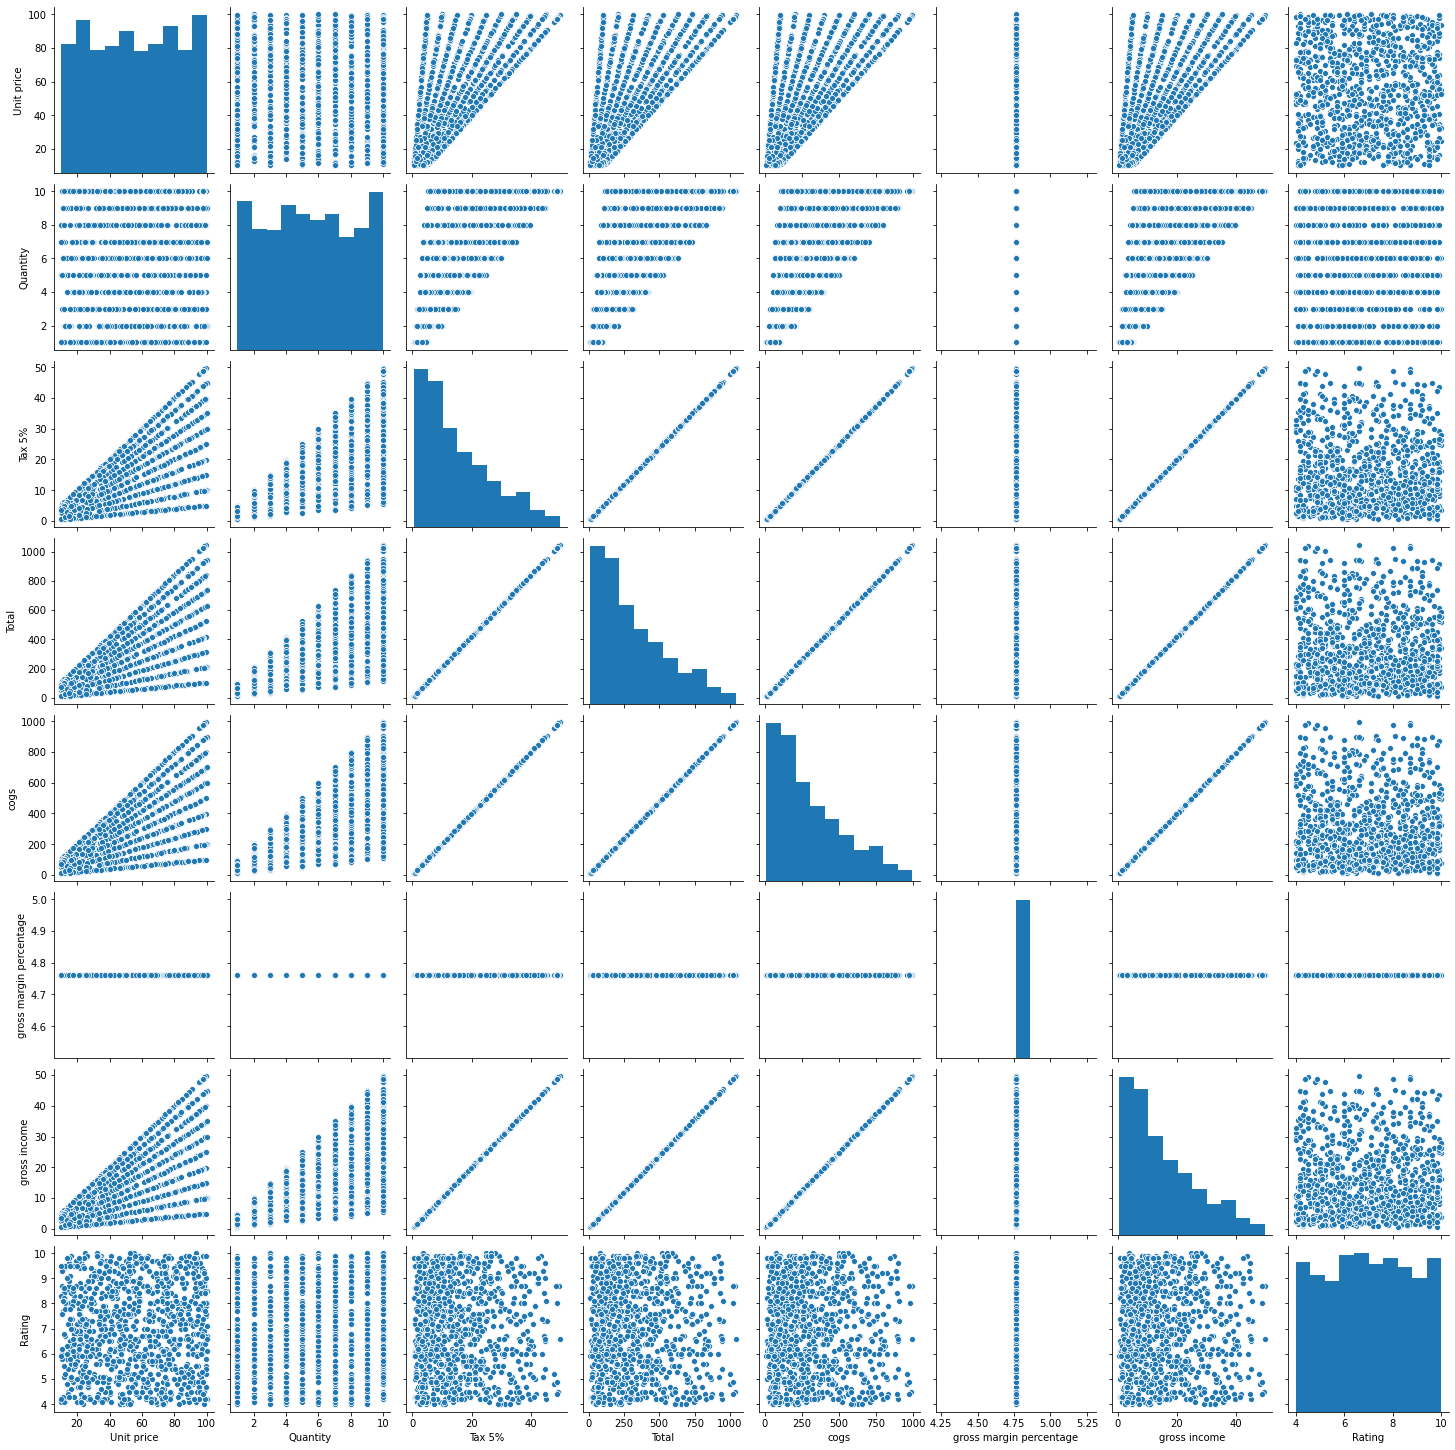

In [178]:
# pengecekan keterkaitan antar column
sb.pairplot(raw_data)

sus : gross margin presentage

In [9]:
print(raw_data["gross margin percentage"].value_counts())
#terbukti sus

4.761905    1000
Name: gross margin percentage, dtype: int64


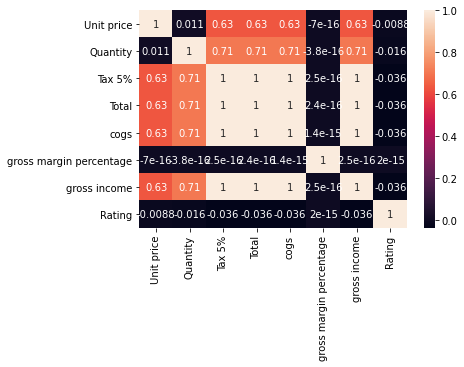

In [10]:
sb.heatmap(raw_data.corr(), annot=True)

In [11]:
raw_data.describe().T

count        mean           std        min  \
Unit price               1000.0   55.672130  2.649463e+01  10.080000   
Quantity                 1000.0    5.510000  2.923431e+00   1.000000   
Tax 5%                   1000.0   15.379369  1.170883e+01   0.508500   
Total                    1000.0  322.966749  2.458853e+02  10.678500   
cogs                     1000.0  307.587380  2.341765e+02  10.170000   
gross margin percentage  1000.0    4.761905  6.220360e-14   4.761905   
gross income             1000.0   15.379369  1.170883e+01   0.508500   
Rating                   1000.0    6.972700  1.718580e+00   4.000000   

                                25%         50%         75%          max  
Unit price                32.875000   55.230000   77.935000    99.960000  
Quantity                   3.000000    5.000000    8.000000    10.000000  
Tax 5%                     5.924875   12.088000   22.445250    49.650000  
Total                    124.422375  253.848000  471.350250  1042.650000  
cogs                     118.497500  241.760000  448.905000   993.000000  
gross margin percentage    4.761905    4.761905    4.761905     4.761905  
gross income               5.924875   12.088000   22.445250    49.650000  
Rating                     5.500000    7.000000    8.500000    10.000000

## jawaban nomor 3
lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan

In [12]:
# cek duplikasi ID
duplicated = raw_data[raw_data.duplicated(["Invoice ID"])].index
duplicated
#tidak ada duplikasi id yang searusnya unique, aman

Int64Index([], dtype='int64')

In [13]:
#pembersihan kolom yang tidak dibutuhkan dan yang di proses sebelumnya terbukti sus
#tidak dibutuhkan : id | date time => (probably, tetapi disini kita reformat dulu dia kedalam dateTime)
#terbukti sus : City, gross margin percentage
new_raw_data = raw_data.drop(columns=["Invoice ID","City","gross margin percentage"])

new_raw_data["Date Time"] = new_raw_data["Date"]+" "+new_raw_data["Time"]
new_raw_data["Date Time"] = pd.to_datetime(new_raw_data["Date Time"])
new_raw_data = new_raw_data.drop(columns=["Date","Time"])

new_raw_data.info()
new_raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   Customer type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product line   1000 non-null   object        
 4   Unit price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Tax 5%         1000 non-null   float64       
 7   Total          1000 non-null   float64       
 8   Payment        1000 non-null   object        
 9   cogs           1000 non-null   float64       
 10  gross income   1000 non-null   float64       
 11  Rating         1000 non-null   float64       
 12  Date Time      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 101.7+ KB


Branch Customer type  Gender            Product line  Unit price  Quantity  \
0      A        Member  Female       Health and beauty       74.69         7   
1      C        Normal  Female  Electronic accessories       15.28         5   
2      A        Normal    Male      Home and lifestyle       46.33         7   
3      A        Member    Male       Health and beauty       58.22         8   
4      A        Normal    Male       Sports and travel       86.31         7   

    Tax 5%     Total      Payment    cogs  gross income  Rating  \
0  26.1415  548.9715      Ewallet  522.83       26.1415     9.1   
1   3.8200   80.2200         Cash   76.40        3.8200     9.6   
2  16.2155  340.5255  Credit card  324.31       16.2155     7.4   
3  23.2880  489.0480      Ewallet  465.76       23.2880     8.4   
4  30.2085  634.3785      Ewallet  604.17       30.2085     5.3   

            Date Time  
0 2019-01-05 13:08:00  
1 2019-03-08 10:29:00  
2 2019-03-03 13:23:00  
3 2019-01-27 20:33:00  
4 2019-02-08 10:37:00

In [14]:
numeric_col = ["Unit price", "Quantity", "Tax 5%", "Total", "cogs", "gross income", "Rating" ]
category_col = ["Branch", "Customer type", "Gender", "Product line", "Payment" ]

ratiing : tujuan akhir, clustering / regresi, menebak tingkat kepuasan pelanggan

<ul>
    <li><h2>hapus data yang tidak perlu : step_1</h2></li>
</ul>

<pre>
variabel dependen :
    - rating 
    - gross_income
</pre>

<ul>
    <li><h2>one hot encoding : step_2</h2></li>
</ul>

<ul>
    <li><h2>pengelompokan berdasarkan cabang toko : step_3</h2></li>
</ul>

# training and validation
## prediksi rating (kepuasan) konsumen

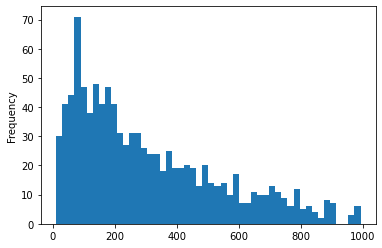

In [15]:
raw_data['cogs'].plot(kind='hist', bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66d3ae1310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66d3ad4730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66d3ae1730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66d3ad1f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66d3ad1a60>],
 'means': []}

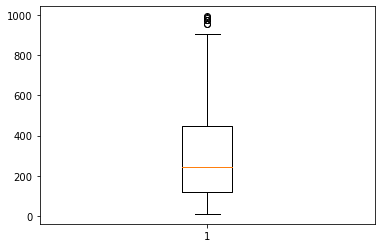

In [22]:
plt.boxplot(raw_data['cogs'])

In [16]:
#tes standar deviasi
index_cogs = raw_data[raw_data['cogs'] > 3 * raw_data['cogs'].std() + 150 ].index
data_clean = raw_data.drop(index_cogs, axis=0)

In [17]:
index_cogs

Int64Index([ 70,  96, 105, 122, 140, 141, 158, 166, 167, 209, 350, 357, 422,
            429, 435, 529, 557, 561, 611, 663, 699, 792, 941, 959, 982, 996],
           dtype='int64')

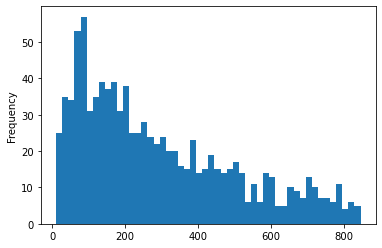

In [18]:
data_clean['cogs'].plot(kind='hist', bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f66d8207d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f66d3a04d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f66d3a25d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f66d81983d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f66d8198550>],
 'means': []}

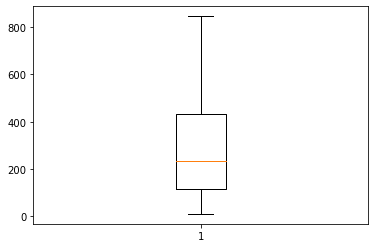

In [21]:
plt.boxplot(data_clean['cogs'])

In [ ]:
data_clean.info()